In [ ]:
# The VGG16 model - Convolutional Network for Classification and Detection
# By default VGG-16 model expects color input images (224x224)
# https://www.youtube.com/watch?v=mjk4vDYOwq0

In [23]:
# install all necessary packages
import os
import pandas as pd
import numpy as np
import seaborn
import scipy
import matplotlib
from matplotlib.pyplot import imread
import tensorflow
import keras
from keras.applications.vgg16 import VGG16
from tensorflow.keras.utils import load_img
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.vgg16 import preprocess_input, decode_predictions

In [3]:
# load empty model (224x224)
# model is trained on ImageNet dataset
model = VGG16()

2022-06-20 10:25:38.745418: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


553467096/553467096 [==============================] - 21s 0us/step


In [4]:
# look at model summary
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
# load test image
image = load_img("phone.jpg", target_size=(224, 224))

In [12]:
# convert image to numpy array
image = np.array(image)

In [13]:
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

In [14]:
# prepare the image for the VGG16 model
image = preprocess_input(image)
image

array([[[[78.061   , 55.221   , 41.32    ],
         [78.061   , 55.221   , 41.32    ],
         [74.061   , 53.221   , 39.32    ],
         ...,
         [86.061   , 64.221   , 47.32    ],
         [87.061   , 64.221   , 47.32    ],
         [89.061   , 66.221   , 49.32    ]],

        [[76.061   , 53.221   , 39.32    ],
         [80.061   , 57.221   , 43.32    ],
         [76.061   , 55.221   , 41.32    ],
         ...,
         [85.061   , 63.221   , 46.32    ],
         [85.061   , 63.221   , 46.32    ],
         [87.061   , 65.221   , 48.32    ]],

        [[82.061   , 59.221   , 45.32    ],
         [80.061   , 57.221   , 43.32    ],
         [76.061   , 55.221   , 41.32    ],
         ...,
         [85.061   , 63.221   , 47.32    ],
         [84.061   , 62.221   , 45.32    ],
         [87.061   , 65.221   , 48.32    ]],

        ...,

        [[89.061   , 67.221   , 47.32    ],
         [89.061   , 67.221   , 47.32    ],
         [87.061   , 64.221   , 47.32    ],
         ...,


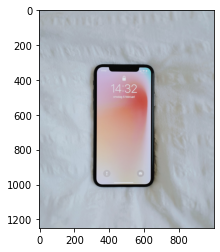

In [21]:
# display image
my_image = imread("phone.jpg")
matplotlib.pyplot.imshow(my_image)

In [22]:
# predict image class
yhat = model.predict(image)
yhat

1/1 [==============================] - 1s 895ms/step


array([[5.48107358e-11, 2.65882139e-09, 7.55279284e-10, 1.51547952e-09,
        5.42003165e-10, 2.90516100e-09, 1.60315032e-08, 4.46465975e-10,
        1.44246382e-09, 7.15681681e-10, 5.99685412e-10, 2.37919617e-09,
        8.20257695e-10, 1.00471942e-08, 1.17538401e-09, 1.84474477e-10,
        8.85645099e-11, 9.63617186e-10, 8.06412981e-09, 5.97582472e-09,
        1.93899993e-10, 2.30969133e-11, 2.35744479e-10, 1.92960425e-09,
        2.10794759e-09, 8.92591778e-10, 7.18988591e-10, 5.57289725e-09,
        3.45132678e-09, 2.23336993e-08, 3.12652057e-11, 2.63108513e-09,
        3.66387393e-10, 6.47613282e-11, 1.49333879e-10, 8.04853961e-11,
        6.24057195e-10, 1.71224535e-10, 2.39187142e-10, 4.15469742e-11,
        2.07763118e-09, 5.45630430e-10, 2.21089619e-10, 4.67394352e-11,
        5.46059364e-10, 1.38362066e-09, 3.02897840e-09, 5.40365738e-11,
        3.75349959e-11, 1.13868470e-09, 7.03511749e-10, 1.83645876e-11,
        3.80292562e-08, 4.08667269e-08, 4.24695112e-10, 2.092108

In [24]:
# convert probabilities to class labels
label = decode_predictions(yhat)
label

35363/35363 [==============================] - 0s 0us/step


[[('n04372370', 'switch', 0.91923463),
  ('n03584254', 'iPod', 0.059598874),
  ('n04074963', 'remote_control', 0.004593055),
  ('n03777754', 'modem', 0.0042622024),
  ('n04116512', 'rubber_eraser', 0.002378854)]]